# Problem Statement
Use decision trees to prepare a model on fraud data                                      
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"
### Data Description :
    Undergrad       : person is under graduated or not
    Marital.Status  : marital status of a person
    Taxable.Income  : Taxable income is the amount of how much tax an individual owes to the government 
    Work Experience : Work experience of an individual person
    Urban           : Whether that person belongs to urban area or not

# Importing Necessary Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing Data

In [34]:
raw_data = pd.read_csv('Fraud_check.csv')
raw_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# Data Cleaning

In [35]:
raw_data['Taxable.Income'] = (raw_data['Taxable.Income'] <= 30000).map({True : 'Risky', False : 'Good'})
raw_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


In [36]:
raw_data['Taxable.Income'].unique()

array(['Good', 'Risky'], dtype=object)

In [37]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    object
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


In [38]:
data = pd.get_dummies(raw_data, drop_first=True)
data.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Taxable.Income_Risky,Urban_YES
0,50047,10,0,0,1,0,1
1,134075,18,1,0,0,0,1
2,160205,30,0,1,0,0,1
3,193264,15,1,0,1,0,1
4,27533,28,0,1,0,0,0


In [39]:
data['Taxable.Income_Risky'].unique()

array([0, 1], dtype=uint8)

# Defining Dependent and Independent Variables

In [40]:
X = data.drop('Taxable.Income_Risky', axis = 1)
y = data['Taxable.Income_Risky']

# Splitting the Data for Training and Testing

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    stratify = raw_data['Taxable.Income'], random_state = 42)

# Decision Tree Classifier with Maximum Depth = 5

In [42]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(max_depth= 5)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

# Tree Visualization

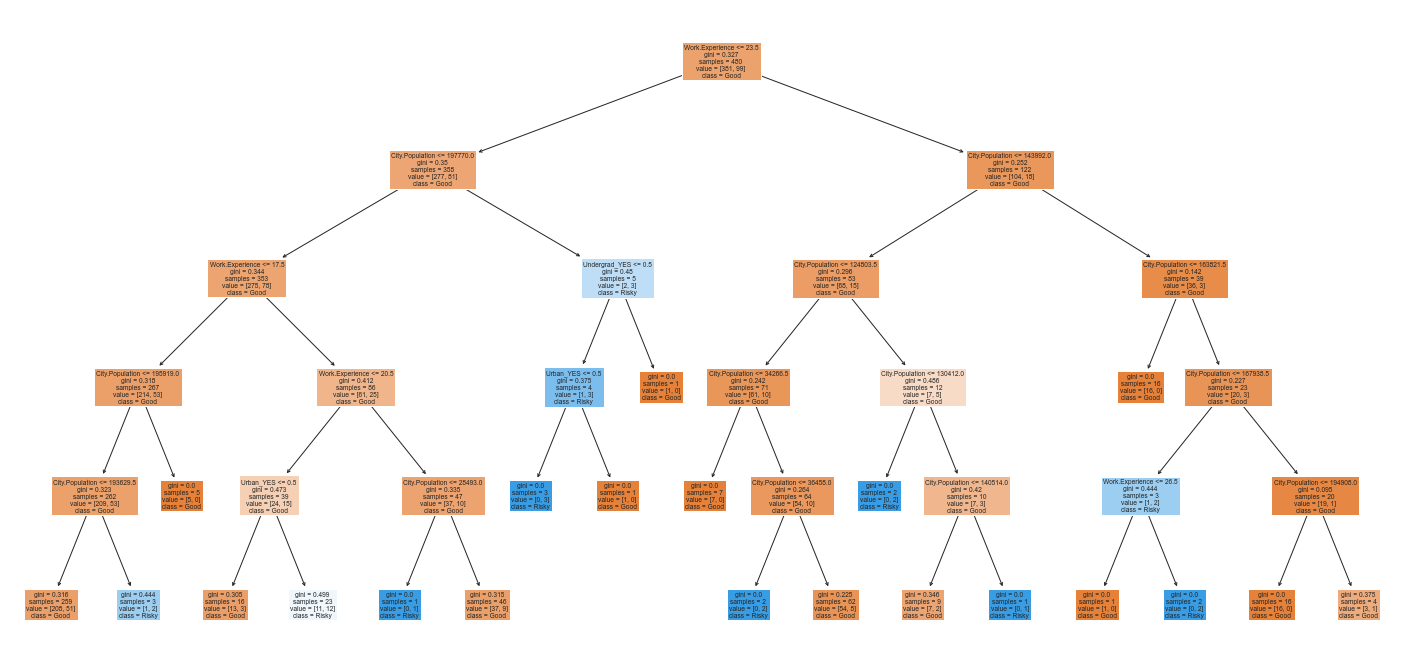

In [43]:
plt.figure(figsize=(25,12))
plot_tree(clf, feature_names=X.columns, class_names=raw_data['Taxable.Income'].unique(), filled=True)
plt.show()

# Confusion Matrix and Classification Report

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = clf.predict(x_train)
confusion_matrix(y_train, y_pred)

array([[369,  12],
       [ 74,  25]], dtype=int64)

In [45]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90       381
           1       0.68      0.25      0.37        99

    accuracy                           0.82       480
   macro avg       0.75      0.61      0.63       480
weighted avg       0.80      0.82      0.79       480



# Model Testing

In [46]:
y_test_pred = clf.predict(x_test)
confusion_matrix(y_test, y_test_pred)

array([[91,  4],
       [22,  3]], dtype=int64)

In [47]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        95
           1       0.43      0.12      0.19        25

    accuracy                           0.78       120
   macro avg       0.62      0.54      0.53       120
weighted avg       0.73      0.78      0.73       120



# Decision Tree with Maximum Depth = 4

In [48]:
clf_4 = DecisionTreeClassifier(max_depth= 4)
clf_4.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

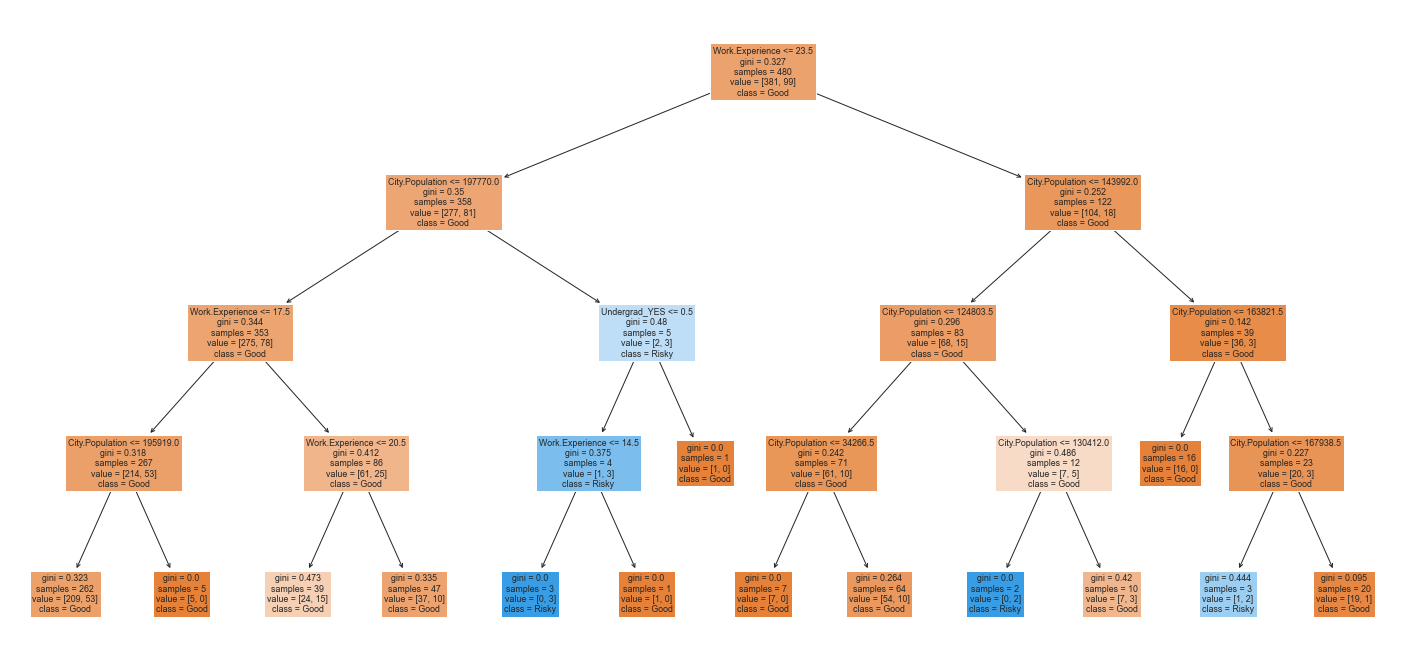

In [49]:
plt.figure(figsize=(25,12))
plot_tree(clf_4, feature_names=X.columns, class_names=raw_data['Taxable.Income'].unique(), filled=True)
plt.show()

In [50]:
y_pred_4 = clf_4.predict(x_train)
confusion_matrix(y_train, y_pred_4)

array([[380,   1],
       [ 92,   7]], dtype=int64)

In [51]:
print(classification_report(y_train, y_pred_4))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       381
           1       0.88      0.07      0.13        99

    accuracy                           0.81       480
   macro avg       0.84      0.53      0.51       480
weighted avg       0.82      0.81      0.73       480



In [52]:
y_test_pred_4 = clf_4.predict(x_test)
confusion_matrix(y_test, y_test_pred_4)

array([[94,  1],
       [24,  1]], dtype=int64)

In [53]:
print(classification_report(y_test, y_test_pred_4))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88        95
           1       0.50      0.04      0.07        25

    accuracy                           0.79       120
   macro avg       0.65      0.51      0.48       120
weighted avg       0.73      0.79      0.71       120



# 

# Using Hypermarameter (Criterion = 'entropy')

In [54]:
clf_ent = DecisionTreeClassifier(max_depth= 5, criterion='entropy')
clf_ent.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

# Tree Visualization

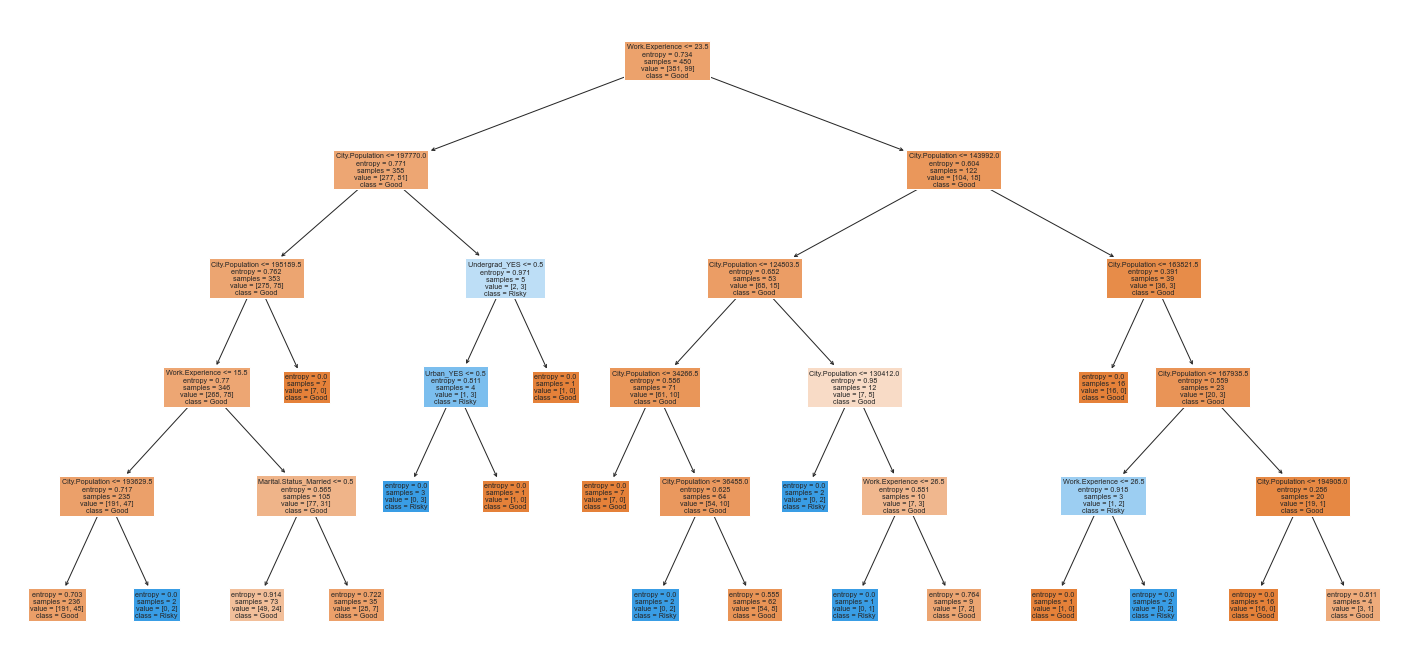

In [55]:
plt.figure(figsize=(25,12))
plot_tree(clf_ent, feature_names=X.columns, class_names=raw_data['Taxable.Income'].unique(), filled=True)
plt.show()

# Confusion Matrix and Classification Report

In [56]:
y_pred_ent = clf_ent.predict(x_train)
confusion_matrix(y_train, y_pred_ent)

array([[381,   0],
       [ 87,  12]], dtype=int64)

In [57]:
print(classification_report(y_train, y_pred_ent))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       381
           1       1.00      0.12      0.22        99

    accuracy                           0.82       480
   macro avg       0.91      0.56      0.56       480
weighted avg       0.85      0.82      0.76       480



# Model Testing

In [58]:
y_test_pred_ent = clf_ent.predict(x_test)
confusion_matrix(y_test, y_test_pred_ent)

array([[95,  0],
       [24,  1]], dtype=int64)

In [59]:
print(classification_report(y_test, y_test_pred_ent))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        95
           1       1.00      0.04      0.08        25

    accuracy                           0.80       120
   macro avg       0.90      0.52      0.48       120
weighted avg       0.84      0.80      0.72       120



# Both Gini Impurity and Entropy give same results